In [159]:
import json
import numpy as np
node_dict = {}
with open("san_francisco_censustracts.json") as jsondata:
    d = json.load(jsondata)
    for feature in d["features"]:
        if feature["properties"]["DISPLAY_NAME"] == "100 Campus Drive, Stanford":
            print("Stanford", feature["properties"]["MOVEMENT_ID"])
        if feature["properties"]["DISPLAY_NAME"] == "700 Meder Street, Santa Cruz":
            print("UCSC", feature["properties"]["MOVEMENT_ID"])
        data = feature["geometry"]["coordinates"][0][0]
        c1= []
        c2 = []
        for d in data:
            c1.append(d[0])
            c2.append(d[1])
        node_dict[int(feature["properties"]["MOVEMENT_ID"])] = [np.mean(c1), np.mean(c2)]

UCSC 1968
Stanford 2607


In [160]:
print(node_dict[1968])
print(node_dict[2607])

[-122.0645618108108, 36.97416881081081]
[-122.17598222222222, 37.42968588888889]


In [161]:
from scipy.spatial import Delaunay
import numpy as np
# print(node_dict.values())

In [162]:
# stanford_nodes = stanford_nodes[0][0]
# ucsc_nodes = ucsc_nodes[0][0]

# nodes = []
# for node in stanford_nodes:
#     nodes.append(node)
# for node in ucsc_nodes:
#     nodes.append(node)
points = np.array(list(node_dict.values()))

In [163]:
print(len(points))

2710


In [164]:
print(points[1967])
print(points[2606])

[-122.06456181   36.97416881]
[-122.17598222   37.42968589]


In [165]:
tri = Delaunay(points)

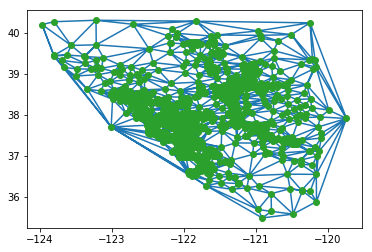

In [166]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [167]:
print(tri.vertices[1])

[204 247 629]


In [168]:
edges = set() 
for n in range(tri.nsimplex): 
    edge = ([tri.vertices[n,0], tri.vertices[n,1]]) 
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
    edge = ([tri.vertices[n,0], tri.vertices[n,2]]) 
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
    edge = ([tri.vertices[n,1], tri.vertices[n,2]])     
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
# print(edges)

In [181]:
import csv
speed_dict = {}
with open('san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    next(csvReader, None)
    for row in csvReader:
        if row[2] == "12":
            sorted_list = sorted([int(row[0]) - 1, int(row[1]) - 1])
            keypair = (sorted_list[0], sorted_list[1])
            if keypair in speed_dict:
                speed_dict[keypair].append(float(row[3]))
            else:
                speed_dict[keypair] = [float(row[3])]
#             keypair = (int(row[1]) - 1, int(row[0]) - 1)
#             if keypair in speed_dict:
#                 speed_dict[keypair].append(float(row[3]))
#             else:
#                 speed_dict[keypair] = [float(row[3])]


In [182]:
for key, value in zip(speed_dict.keys(), speed_dict.values()):
    speed_dict[key] = np.mean(value)

In [183]:
traffic_flows = {}
filtered_edges = []
filtered_points = []
for i in range(len(edges)):
    edge = list(edges)[i]
#     start = points[edge[0]]
#     end = points[edge[1]]
    start = node_dict[edge[0]]
    end = node_dict[edge[1]]
    key1 = (edge[0],edge[1])
    if key1 in speed_dict:
        filtered_edges.append(edge)
        filtered_points.append(node_dict[edge[0]])
        filtered_points.append(node_dict[edge[1]])
        road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
        speed = road_len/speed_dict[key1]
#         road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
    #     traffic_flow = 4*(road_len / (0.003 + (60 * 2)/3600.0))
        traffic_flow = speed * (1/(0.003 + (speed * 2)/3600.0))
        traffic_flows[edge] = traffic_flow
        print("For road: ", edge, " the traffic flow is: ", traffic_flow)



For road:  (476, 1031)  the traffic flow is:  1630.5151549815046
For road:  (332, 2423)  the traffic flow is:  1694.327954124744
For road:  (95, 1515)  the traffic flow is:  1717.6179299193416
For road:  (648, 1294)  the traffic flow is:  1617.6989257832154
For road:  (231, 2512)  the traffic flow is:  1762.8003593689232
For road:  (1268, 2361)  the traffic flow is:  1681.469396746434
For road:  (1932, 1934)  the traffic flow is:  1703.9402192268824
For road:  (1996, 2157)  the traffic flow is:  1603.5911145685081
For road:  (2011, 2387)  the traffic flow is:  1646.6896470158074
For road:  (1043, 1637)  the traffic flow is:  1617.7485742063946
For road:  (1926, 2520)  the traffic flow is:  1715.9269766988716
For road:  (984, 1587)  the traffic flow is:  1595.2082571690773
For road:  (1755, 2247)  the traffic flow is:  1660.9506146167407
For road:  (610, 2596)  the traffic flow is:  1638.7015336563543
For road:  (567, 746)  the traffic flow is:  1678.3604983642613
For road:  (2225, 2519

For road:  (221, 1588)  the traffic flow is:  1720.899091990506
For road:  (1807, 2340)  the traffic flow is:  1682.7825631949345
For road:  (1127, 2281)  the traffic flow is:  1679.8221695175284
For road:  (698, 831)  the traffic flow is:  1669.2785053295308
For road:  (2132, 2134)  the traffic flow is:  1512.7655619592758
For road:  (398, 1200)  the traffic flow is:  1607.0613351258346
For road:  (815, 981)  the traffic flow is:  1620.0313318035705
For road:  (1594, 1596)  the traffic flow is:  1728.1679261130423
For road:  (1331, 1934)  the traffic flow is:  1716.6846452367222
For road:  (486, 1625)  the traffic flow is:  1714.6668836624451
For road:  (1265, 2543)  the traffic flow is:  1607.367728754272
For road:  (936, 2633)  the traffic flow is:  1623.4364063068901
For road:  (702, 2151)  the traffic flow is:  1697.7231177806807
For road:  (295, 2019)  the traffic flow is:  1657.1128339629745
For road:  (1012, 1623)  the traffic flow is:  1663.682004152838
For road:  (1171, 2268)

For road:  (699, 1240)  the traffic flow is:  1667.4181645269368
For road:  (1546, 2419)  the traffic flow is:  1626.8040318481233
For road:  (741, 1357)  the traffic flow is:  1696.13855491558
For road:  (619, 1022)  the traffic flow is:  1640.9177078194712
For road:  (64, 1556)  the traffic flow is:  1650.0210359161285
For road:  (694, 1919)  the traffic flow is:  1728.5158768042957
For road:  (474, 1024)  the traffic flow is:  1661.362313297863
For road:  (948, 1052)  the traffic flow is:  1667.869455377433
For road:  (922, 2547)  the traffic flow is:  1766.383873241039
For road:  (952, 2687)  the traffic flow is:  1715.495333546986
For road:  (1113, 2116)  the traffic flow is:  1451.2696140966348
For road:  (678, 1728)  the traffic flow is:  1687.8820945497368
For road:  (1244, 1689)  the traffic flow is:  1666.5633660769952
For road:  (60, 1566)  the traffic flow is:  1708.9004205268154
For road:  (822, 1914)  the traffic flow is:  1715.0696209392947
For road:  (1567, 2156)  the t

For road:  (763, 2469)  the traffic flow is:  1672.1617278804688
For road:  (2243, 2509)  the traffic flow is:  1679.4096216579617
For road:  (1087, 1519)  the traffic flow is:  1668.5947372939725
For road:  (1171, 1172)  the traffic flow is:  1686.4658842486313
For road:  (600, 2421)  the traffic flow is:  1685.1751627406018
For road:  (812, 2402)  the traffic flow is:  1703.7615381959192
For road:  (1534, 2435)  the traffic flow is:  1752.1504671618718
For road:  (905, 1256)  the traffic flow is:  1716.4975919889598
For road:  (334, 1621)  the traffic flow is:  1639.0904407070307
For road:  (792, 1718)  the traffic flow is:  1504.123015995271
For road:  (82, 766)  the traffic flow is:  1546.361925290194
For road:  (486, 1636)  the traffic flow is:  1599.6270464605363
For road:  (936, 1069)  the traffic flow is:  1718.8935576651347
For road:  (287, 1095)  the traffic flow is:  1681.798161404342
For road:  (641, 1689)  the traffic flow is:  1676.2547347706166
For road:  (23, 1993)  the

For road:  (459, 1461)  the traffic flow is:  1671.5899921374244
For road:  (233, 1728)  the traffic flow is:  1657.708668177455
For road:  (2001, 2589)  the traffic flow is:  1655.2058496368566
For road:  (467, 1595)  the traffic flow is:  1548.1896494310738
For road:  (696, 1219)  the traffic flow is:  1718.4177008858082
For road:  (763, 2468)  the traffic flow is:  1566.2784471234563
For road:  (2627, 2685)  the traffic flow is:  1613.0927650736833
For road:  (619, 1613)  the traffic flow is:  1657.3661167855769
For road:  (1120, 2134)  the traffic flow is:  1606.1230026787966
For road:  (124, 561)  the traffic flow is:  1707.7813999485174
For road:  (1773, 2498)  the traffic flow is:  1689.7811209277722
For road:  (1714, 2328)  the traffic flow is:  1682.7646698312553
For road:  (30, 1657)  the traffic flow is:  1732.1632790032077
For road:  (114, 1718)  the traffic flow is:  1650.254759438046
For road:  (636, 1611)  the traffic flow is:  1653.71328240525
For road:  (2246, 2638)  t

For road:  (405, 2585)  the traffic flow is:  1609.180078500604
For road:  (494, 1456)  the traffic flow is:  1716.112826089927
For road:  (687, 1904)  the traffic flow is:  1729.3721811523114
For road:  (23, 1212)  the traffic flow is:  1630.0251073631623
For road:  (381, 472)  the traffic flow is:  1720.3449148573793
For road:  (439, 760)  the traffic flow is:  1619.1981661454265
For road:  (643, 1691)  the traffic flow is:  1673.3696364097816
For road:  (268, 1018)  the traffic flow is:  1604.9933233271913
For road:  (269, 399)  the traffic flow is:  1704.4091675243924
For road:  (82, 776)  the traffic flow is:  1624.0853316816285
For road:  (1147, 1813)  the traffic flow is:  1771.3268139868371
For road:  (928, 1907)  the traffic flow is:  1616.8535997142287
For road:  (2224, 2420)  the traffic flow is:  1709.195287277123
For road:  (2268, 2661)  the traffic flow is:  1516.624140738334
For road:  (43, 1943)  the traffic flow is:  1719.3930649540794
For road:  (1179, 2414)  the traf

For road:  (812, 842)  the traffic flow is:  1712.0478795011793
For road:  (1936, 2655)  the traffic flow is:  1714.4946447051411
For road:  (704, 1838)  the traffic flow is:  1756.0227093947499
For road:  (446, 1094)  the traffic flow is:  1651.681739766027
For road:  (293, 2073)  the traffic flow is:  1613.6423462204464
For road:  (826, 1619)  the traffic flow is:  1523.5609656236152
For road:  (1601, 2015)  the traffic flow is:  1356.7310680523176
For road:  (288, 1102)  the traffic flow is:  1679.0725096756612
For road:  (598, 1062)  the traffic flow is:  1591.4319970043505
For road:  (1450, 1451)  the traffic flow is:  1705.639273848176
For road:  (1040, 1623)  the traffic flow is:  1638.4517514112817
For road:  (232, 409)  the traffic flow is:  1441.5089123521204
For road:  (929, 1913)  the traffic flow is:  1711.0226355200089
For road:  (718, 1908)  the traffic flow is:  1737.4491376172007
For road:  (2513, 2686)  the traffic flow is:  1709.4763068314141
For road:  (1029, 1048) 

For road:  (1303, 1909)  the traffic flow is:  1694.439995434405
For road:  (1589, 1712)  the traffic flow is:  1548.318934355382
For road:  (648, 1696)  the traffic flow is:  1746.0884385139316
For road:  (1848, 1849)  the traffic flow is:  1693.8852938635648
For road:  (1655, 2200)  the traffic flow is:  1485.6030498736882
For road:  (68, 2122)  the traffic flow is:  1626.8383700764389
For road:  (321, 1045)  the traffic flow is:  1765.259200316399
For road:  (135, 2671)  the traffic flow is:  1682.8724624260647
For road:  (613, 1550)  the traffic flow is:  1676.2326636858186
For road:  (1608, 1618)  the traffic flow is:  1664.9077572646568
For road:  (1303, 2170)  the traffic flow is:  1613.0757610164533
For road:  (240, 2681)  the traffic flow is:  1704.6608241686708
For road:  (879, 2568)  the traffic flow is:  1754.0776708567562
For road:  (615, 2195)  the traffic flow is:  1510.6584975360795
For road:  (1996, 2020)  the traffic flow is:  1092.842202689583
For road:  (57, 463)  t

For road:  (133, 1936)  the traffic flow is:  1691.3102677326738
For road:  (1276, 2440)  the traffic flow is:  1738.5711637780892
For road:  (2304, 2657)  the traffic flow is:  1582.1873109175624
For road:  (415, 487)  the traffic flow is:  1706.4318950238087
For road:  (668, 1321)  the traffic flow is:  1773.853126940098
For road:  (79, 906)  the traffic flow is:  1713.813627214465
For road:  (1170, 2111)  the traffic flow is:  1575.831514360076
For road:  (458, 1533)  the traffic flow is:  1678.0080881405777
For road:  (1226, 2398)  the traffic flow is:  1402.820615888303
For road:  (437, 1823)  the traffic flow is:  1703.0367502565139
For road:  (956, 1549)  the traffic flow is:  1713.5040563196073
For road:  (386, 1583)  the traffic flow is:  1717.5131066708623
For road:  (124, 741)  the traffic flow is:  1650.5757062752807
For road:  (250, 920)  the traffic flow is:  1598.986955372691
For road:  (211, 1243)  the traffic flow is:  1672.7773037017614
For road:  (1068, 2633)  the tr

For road:  (2451, 2502)  the traffic flow is:  1706.6351655849464
For road:  (1029, 1056)  the traffic flow is:  1732.1868264757343
For road:  (1771, 2613)  the traffic flow is:  1701.3768329822854
For road:  (1292, 1770)  the traffic flow is:  1703.3378270322946
For road:  (1466, 1749)  the traffic flow is:  1716.3849552306428
For road:  (1478, 2397)  the traffic flow is:  1599.0708981904852
For road:  (280, 1616)  the traffic flow is:  1651.0748983800206
For road:  (387, 1684)  the traffic flow is:  1498.0435556068642
For road:  (664, 1782)  the traffic flow is:  1753.9776484074157
For road:  (80, 2317)  the traffic flow is:  1624.3426359185207
For road:  (1873, 1927)  the traffic flow is:  1665.6352571923926
For road:  (278, 2533)  the traffic flow is:  1548.5277193413315
For road:  (1216, 1217)  the traffic flow is:  1665.7094859029216
For road:  (1291, 1297)  the traffic flow is:  1613.829042071481
For road:  (1920, 1922)  the traffic flow is:  1719.559798056526
For road:  (1356, 

For road:  (952, 1616)  the traffic flow is:  1675.4212403488887
For road:  (303, 2168)  the traffic flow is:  1717.8103203340468
For road:  (1057, 2213)  the traffic flow is:  1673.9874055519456
For road:  (618, 1021)  the traffic flow is:  1537.2924794154706
For road:  (645, 2494)  the traffic flow is:  1707.1658441286681
For road:  (1071, 1524)  the traffic flow is:  1680.045928105483
For road:  (1271, 1628)  the traffic flow is:  1707.509992317153
For road:  (1266, 2468)  the traffic flow is:  1498.3359907579957
For road:  (812, 1072)  the traffic flow is:  1682.4699441457985
For road:  (1045, 1055)  the traffic flow is:  1713.4044145489258
For road:  (1423, 1430)  the traffic flow is:  1496.1239530865255
For road:  (437, 1335)  the traffic flow is:  1687.992968160818
For road:  (1472, 1552)  the traffic flow is:  1360.6842803539955
For road:  (399, 1211)  the traffic flow is:  1673.939964752972
For road:  (658, 1294)  the traffic flow is:  1702.6839649853982
For road:  (557, 2221)

For road:  (1907, 2153)  the traffic flow is:  1590.4405361232566
For road:  (895, 1161)  the traffic flow is:  1454.7237887514264
For road:  (1538, 2341)  the traffic flow is:  1731.4649168267636
For road:  (1536, 2518)  the traffic flow is:  1695.5551205136012
For road:  (2570, 2705)  the traffic flow is:  1758.6504657465446
For road:  (1203, 2587)  the traffic flow is:  1674.4810790800268
For road:  (1889, 1892)  the traffic flow is:  1730.331962284296
For road:  (323, 472)  the traffic flow is:  1691.2662960789244
For road:  (275, 1993)  the traffic flow is:  1701.1190281218742
For road:  (20, 1676)  the traffic flow is:  1723.0710441351428
For road:  (152, 720)  the traffic flow is:  1698.9132935068208
For road:  (26, 2544)  the traffic flow is:  1684.632649301191
For road:  (487, 1615)  the traffic flow is:  1635.6988757507027
For road:  (2420, 2434)  the traffic flow is:  1652.0694251816465
For road:  (1184, 2125)  the traffic flow is:  1633.5860381009759
For road:  (433, 535)  

For road:  (596, 2633)  the traffic flow is:  1637.1183573586898
For road:  (11, 2009)  the traffic flow is:  1325.9501781983197
For road:  (940, 2010)  the traffic flow is:  1617.8731336005976
For road:  (140, 2470)  the traffic flow is:  1636.9357394454848
For road:  (323, 1564)  the traffic flow is:  1709.6112984905542
For road:  (327, 2408)  the traffic flow is:  1687.4979282283662
For road:  (2071, 2162)  the traffic flow is:  1640.7091743159408
For road:  (1024, 2484)  the traffic flow is:  1703.0865297802372
For road:  (1247, 1945)  the traffic flow is:  1652.801444902843
For road:  (370, 1475)  the traffic flow is:  1685.346127729548
For road:  (177, 2185)  the traffic flow is:  1535.7777336771221
For road:  (1045, 1052)  the traffic flow is:  1746.991349120928
For road:  (1242, 2147)  the traffic flow is:  1705.9969634959384
For road:  (55, 1652)  the traffic flow is:  1685.1694606419783
For road:  (817, 1726)  the traffic flow is:  1578.9002333961946
For road:  (1210, 1471)  

For road:  (2547, 2702)  the traffic flow is:  1717.857306452932
For road:  (170, 281)  the traffic flow is:  1651.4556919440754
For road:  (620, 1612)  the traffic flow is:  1659.5293357291894
For road:  (568, 746)  the traffic flow is:  1584.8676742102639
For road:  (97, 150)  the traffic flow is:  1678.8824126717886
For road:  (567, 2237)  the traffic flow is:  1535.5329243944234
For road:  (2023, 2206)  the traffic flow is:  1469.5761589424594
For road:  (858, 2694)  the traffic flow is:  1712.2696800032572
For road:  (377, 2123)  the traffic flow is:  1483.8612380838388
For road:  (1749, 2338)  the traffic flow is:  1712.689888885111
For road:  (1593, 1594)  the traffic flow is:  1637.314668332899
For road:  (332, 1096)  the traffic flow is:  1666.7547951944214
For road:  (821, 2373)  the traffic flow is:  1740.5908752707433
For road:  (1574, 2161)  the traffic flow is:  1525.9177221765551
For road:  (237, 1494)  the traffic flow is:  1444.943408983453
For road:  (86, 561)  the tr

For road:  (1331, 2595)  the traffic flow is:  1679.11180998283
For road:  (250, 1872)  the traffic flow is:  1697.0123951756023
For road:  (1252, 2151)  the traffic flow is:  1718.014139004896
For road:  (529, 1726)  the traffic flow is:  1707.284001411902
For road:  (1264, 1629)  the traffic flow is:  1686.851658599318
For road:  (1384, 1406)  the traffic flow is:  1514.436455837394
For road:  (928, 1284)  the traffic flow is:  1665.3300933900325
For road:  (570, 2022)  the traffic flow is:  1735.7110546625847
For road:  (152, 1823)  the traffic flow is:  1639.0251742744756
For road:  (1405, 1869)  the traffic flow is:  1418.13171060262
For road:  (1760, 2696)  the traffic flow is:  1691.5581517811556
For road:  (1292, 1647)  the traffic flow is:  1719.3571443742644
For road:  (97, 1558)  the traffic flow is:  1730.9212624397555
For road:  (172, 192)  the traffic flow is:  1677.6979889470572
For road:  (1652, 2133)  the traffic flow is:  1183.6958940918555
For road:  (1988, 2231)  th

For road:  (63, 471)  the traffic flow is:  1701.558622394805
For road:  (1628, 2317)  the traffic flow is:  1704.073653476141
For road:  (1445, 1729)  the traffic flow is:  1645.6610854065864
For road:  (1458, 2581)  the traffic flow is:  1560.6018497480518
For road:  (274, 396)  the traffic flow is:  1695.8151880112136
For road:  (187, 1145)  the traffic flow is:  1677.2910539083066
For road:  (63, 1562)  the traffic flow is:  1668.0709867163819
For road:  (675, 1436)  the traffic flow is:  1720.5050758913274
For road:  (293, 2429)  the traffic flow is:  1656.938387974783
For road:  (170, 623)  the traffic flow is:  1661.3591183663564
For road:  (747, 1423)  the traffic flow is:  1590.9374468256801
For road:  (181, 1182)  the traffic flow is:  1688.7862167251067
For road:  (868, 1036)  the traffic flow is:  1681.9710301118153
For road:  (2113, 2261)  the traffic flow is:  1654.1722738105702
For road:  (274, 882)  the traffic flow is:  1710.6325006272489
For road:  (1223, 2048)  the t

For road:  (1308, 2362)  the traffic flow is:  1737.964682193327
For road:  (1291, 2604)  the traffic flow is:  1594.0232266507564
For road:  (1153, 2563)  the traffic flow is:  1677.042321200816
For road:  (982, 2408)  the traffic flow is:  1694.0132718094296
For road:  (1043, 1605)  the traffic flow is:  1613.689842462859
For road:  (289, 434)  the traffic flow is:  1712.5840588053334
For road:  (308, 2150)  the traffic flow is:  1439.5330404362078
For road:  (1019, 1602)  the traffic flow is:  1608.6568690434895
For road:  (983, 1587)  the traffic flow is:  1636.184149295395
For road:  (1736, 1761)  the traffic flow is:  1611.7309869202172
For road:  (368, 1999)  the traffic flow is:  1668.2585509862365
For road:  (2453, 2509)  the traffic flow is:  1718.2559155947215
For road:  (920, 1386)  the traffic flow is:  1703.93499718593
For road:  (102, 471)  the traffic flow is:  1742.9393079766226
For road:  (402, 2403)  the traffic flow is:  1653.647879423201
For road:  (2028, 2537)  th

For road:  (1173, 2661)  the traffic flow is:  1672.9234764240575
For road:  (275, 1214)  the traffic flow is:  1663.6069948903282
For road:  (1631, 2531)  the traffic flow is:  1677.9520269160978
For road:  (180, 2596)  the traffic flow is:  1743.651443242376
For road:  (2487, 2652)  the traffic flow is:  1728.641517332749
For road:  (268, 2015)  the traffic flow is:  1715.0353586718534
For road:  (1079, 1685)  the traffic flow is:  1290.9491506687912
For road:  (934, 1208)  the traffic flow is:  1656.98932917867
For road:  (1891, 2151)  the traffic flow is:  1642.6877072705754
For road:  (1330, 1933)  the traffic flow is:  1691.021263449807
For road:  (2442, 2465)  the traffic flow is:  1728.2291943687121
For road:  (1457, 1743)  the traffic flow is:  1768.466222428011
For road:  (88, 1968)  the traffic flow is:  1660.8004232300962
For road:  (422, 2116)  the traffic flow is:  1608.7190545617202
For road:  (649, 1780)  the traffic flow is:  1760.642913085504
For road:  (1545, 2486)  

For road:  (211, 1685)  the traffic flow is:  1710.463367453361
For road:  (1060, 2536)  the traffic flow is:  1616.545008796397
For road:  (1943, 2464)  the traffic flow is:  1764.6004418775537
For road:  (958, 1574)  the traffic flow is:  1678.377374655235
For road:  (1203, 1981)  the traffic flow is:  1570.8847597780793
For road:  (1372, 1820)  the traffic flow is:  1745.7582042212384
For road:  (1654, 2209)  the traffic flow is:  1665.1045074204349
For road:  (194, 1269)  the traffic flow is:  1579.559750358554
For road:  (547, 1951)  the traffic flow is:  1745.7723288094307
For road:  (416, 1046)  the traffic flow is:  1713.9882623670524
For road:  (1098, 2590)  the traffic flow is:  1655.8816528256923
For road:  (112, 536)  the traffic flow is:  1732.9839672163146
For road:  (557, 1824)  the traffic flow is:  1706.6396374523079
For road:  (373, 2075)  the traffic flow is:  1639.8269817694677
For road:  (1299, 1767)  the traffic flow is:  1666.149385430296
For road:  (678, 2452)  

In [184]:
import networkx as nx 
graph1 = nx.Graph(list(edges)) 
graph2 = nx.Graph(list(filtered_edges)) 
# print(graph.edges()) 

# largest_g1 = max(nx.connected_component_subgraphs(graph1), key=len)
# graphs_1 = list(nx.connected_component_subgraphs(graph1))
# print(len(graphs_1))
# graphs_2 = list(nx.connected_component_subgraphs(graph2))
# print(len(graphs_2))
largest_g2 = max(nx.connected_component_subgraphs(graph2), key=len)

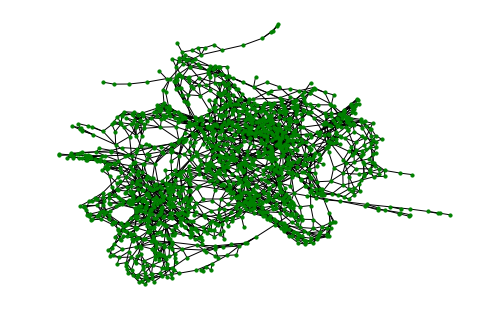

In [185]:
import matplotlib.pyplot as plt 
# pointIDXY = dict(zip(range(len(points)), points)) 
# pointIDXY = dict(zip(range(len(largest_g1.nodes)), largest_g1.nodes))
# nx.draw(graph1,node_size = 10, node_color = "blue") 
# plt.show() 

# pointIDXY = dict(zip(range(len(filtered_points)), filtered_points)) 
nx.draw(largest_g2,node_size = 10, node_color = "green") 
plt.show()

In [186]:
nx.set_edge_attributes(largest_g2, traffic_flows, 'capacity')

In [187]:
print(len(edges))

10810


In [188]:
for (u,v) in largest_g2.edges:
    print(u,v)
    print(largest_g2[u][v])
    if v!=643: break

1 2351
{'capacity': 1712.2311111892448}


#### Q13 Calculate the Max Flow & Calculate the Number of Edge-Disjoint Paths


In [189]:
stanford_id = 2606
UCSC_id = 1967
print(nx.maximum_flow_value(largest_g2, stanford_id, UCSC_id))

from networkx.algorithms.connectivity.disjoint_paths import edge_disjoint_paths
print(len(list(edge_disjoint_paths(largest_g2, stanford_id, UCSC_id))))

3184.2358925766903
2


#### Q14 Defoliate the Graph

In [ ]:
threshold = 20
ebunch = []
for (u,v) in largest_g2.edges():
    if largest_g2[u][v]['weight'] < threshold:
        ebunch.append((u,v))
        
largest_g2.remove_edges_from(ebunch)
# largest_g2.__dict__
# plot on real map coordinates and check bridges location

#### Q15: triangle inequality